# Shila Rahman

## Research question/interests

My research interest includes understanding how a countries wealth and forest area relates to CO2 emission. I will be focusing on these 2 research question:

1) Is GDP in any way related to a country's owned forest area?
    - Compare how top and bottom 15 GFA countries relates to top and bottom 15 GDP countries


In [ ]:
#MileStone2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:

carbonEmissions = pd.read_csv('../data/raw/CO2emissions.csv', skiprows= 4) 
carbonEmissions = carbonEmissions.drop(carbonEmissions.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33, 64, 65]], axis=1)
print(carbonEmissions)


                    Country Name      1990      1991      1992      1993  \
0                          Aruba       NaN       NaN       NaN       NaN   
1    Africa Eastern and Southern  0.999038  0.953224  0.915661  0.916485   
2                    Afghanistan  0.191745  0.167682  0.095958  0.084721   
3     Africa Western and Central  0.478144  0.530016  0.568305  0.523529   
4                         Angola  0.553662  0.544539  0.543557  0.708984   
..                           ...       ...       ...       ...       ...   
261                       Kosovo       NaN       NaN       NaN       NaN   
262                  Yemen, Rep.  0.567037  0.690937  0.704793  0.627105   
263                 South Africa  6.729799  6.424622  6.175430  6.219194   
264                       Zambia  0.340930  0.349232  0.337224  0.289956   
265                     Zimbabwe  1.585444  1.713321  1.694416  1.539741   

         1994      1995      1996      1997      1998  ...      2011  \
0         NaN  

In [4]:
GDP = pd.read_csv('../data/raw/gdp-per-capita-worldbank.csv')
print(GDP)

           Entity Code  Year  \
0     Afghanistan  AFG  2002   
1     Afghanistan  AFG  2003   
2     Afghanistan  AFG  2004   
3     Afghanistan  AFG  2005   
4     Afghanistan  AFG  2006   
...           ...  ...   ...   
6161     Zimbabwe  ZWE  2016   
6162     Zimbabwe  ZWE  2017   
6163     Zimbabwe  ZWE  2018   
6164     Zimbabwe  ZWE  2019   
6165     Zimbabwe  ZWE  2020   

      GDP per capita, PPP (constant 2017 international $)  
0                                           1189.784668    
1                                           1235.810059    
2                                           1200.277954    
3                                           1286.793701    
4                                           1315.789062    
...                                                 ...    
6161                                        3678.217041    
6162                                        3795.642334    
6163                                        3923.030518    
6164           

In [5]:
GFA = pd.read_csv('../data/raw/share-global-forest.csv')
print(GFA)


           Entity Code  Year  Share of global forest area
0     Afghanistan  AFG  1990                     0.028525
1     Afghanistan  AFG  1991                     0.028578
2     Afghanistan  AFG  1992                     0.028631
3     Afghanistan  AFG  1993                     0.028684
4     Afghanistan  AFG  1994                     0.028738
...           ...  ...   ...                          ...
7841     Zimbabwe  ZWE  2016                     0.432198
7842     Zimbabwe  ZWE  2017                     0.431596
7843     Zimbabwe  ZWE  2018                     0.430993
7844     Zimbabwe  ZWE  2019                     0.430389
7845     Zimbabwe  ZWE  2020                     0.429782

[7846 rows x 4 columns]


In [ ]:
#Milestone 3

In [ ]:
#Merging and refininf data for visualisation

In [73]:
mergeGDPndGFA = pd.merge(globalGDP, globalForestArea, on=['Entity'], how = 'left')
mergeGDPndGFA.rename(columns={mergeGDPndGFA.columns[0]: 'Country'}, inplace=True)
print(mergeGDPndGFA)

            Country Code_x  Year_x  \
0       Afghanistan    AFG    2002   
1       Afghanistan    AFG    2002   
2       Afghanistan    AFG    2002   
3       Afghanistan    AFG    2002   
4       Afghanistan    AFG    2002   
...             ...    ...     ...   
169636     Zimbabwe    ZWE    2020   
169637     Zimbabwe    ZWE    2020   
169638     Zimbabwe    ZWE    2020   
169639     Zimbabwe    ZWE    2020   
169640     Zimbabwe    ZWE    2020   

        GDP per capita, PPP (constant 2017 international $) Code_y  Year_y  \
0                                             1189.784668      AFG  1990.0   
1                                             1189.784668      AFG  1991.0   
2                                             1189.784668      AFG  1992.0   
3                                             1189.784668      AFG  1993.0   
4                                             1189.784668      AFG  1994.0   
...                                                   ...      ...     ... 

In [ ]:
#visualisation

## task 1 Cleaning Global forest area Data
### Getting rid of continent and other names from entity thats not a country 
### Getting rid of countries that doesn't match to GDP dataset

In [6]:
values = ['American Samoa','Andorra','Anguilla','British Virgin Islands','Caribbean','Sint Maarten (French part)','Yemen','Venezuela','Vatican','Tokelau','Syria','South Sudan','Saint Pierre and Miquelon','Saint Helena','Pitcairn','Northern Mariana Islands','North Korea','Norfolk Island','Niue','New Caledonia','Montserrat','Monaco','Mayotte','Martinique','Liechtenstein','Isle of Man','Guam','Guadeloupe','Gibraltar','Greenland','Cook Islands','Cuba','Eritrea','Asia','Africa', 'Americas', 'Europe', 'Central America','French Guyana','French Polynesia', 'Central Asia', 'EU-27', 'EU-28','Eastern Africa', 'Eastern Europe', 'Eastern Asia', 'Falkland Islands', 'Faroe Islands','Least Developed Countries','Low Income Food Deficit Countries','Middle Africa', 'Net Food Importing Developing Countries', 'Northern Africa', 'Northern America','Northern Europe','Oceania','Small Island Developing States','South America','Southeastern Asia','Southern Africa','Southern Asia','Southern Europe', 'United States Virgin Islands','Wallis and Futuna Islands','Western Africa', 'Western Asia','Western Europe','Western Sahara','World']
df2=GFA[GFA.Entity.isin(values) == False]

GFAnew=df2.rename(columns={"Entity": "Country","Share of global forest area":"ForestArea"})
print(GFAnew)

          Country Code  Year  ForestArea
0     Afghanistan  AFG  1990    0.028525
1     Afghanistan  AFG  1991    0.028578
2     Afghanistan  AFG  1992    0.028631
3     Afghanistan  AFG  1993    0.028684
4     Afghanistan  AFG  1994    0.028738
...           ...  ...   ...         ...
7841     Zimbabwe  ZWE  2016    0.432198
7842     Zimbabwe  ZWE  2017    0.431596
7843     Zimbabwe  ZWE  2018    0.430993
7844     Zimbabwe  ZWE  2019    0.430389
7845     Zimbabwe  ZWE  2020    0.429782

[5756 rows x 4 columns]


## task 1 continued: Cleaning GDP data
### Getting rid of continent and other names from entity thats not a country
### Getting rid of countries that doesn't match to GFA dataset

In [7]:
values1 = ['Cote','Curacao','Hong Kong','Kosovo','Macao','East Asia and Pacific', 'Europe and Central Asia', 'European Union', 'High income', 'Latin America and Caribbean', 'Low and middle income', 'Low income','Lower middle income', 'Middle East and North Africa', 'Eastern Asia', 'Middle income', 'North America','South Asia','Sub-Saharan Africa','Upper middle income']
df1=GDP[GDP.Entity.isin(values1) == False]

GDPnew=df1.rename(columns={"Entity": "Country","GDP per capita, PPP (constant 2017 international $)":"GDP/capita"})
print(GDPnew)

          Country Code  Year   GDP/capita
0     Afghanistan  AFG  2002  1189.784668
1     Afghanistan  AFG  2003  1235.810059
2     Afghanistan  AFG  2004  1200.277954
3     Afghanistan  AFG  2005  1286.793701
4     Afghanistan  AFG  2006  1315.789062
...           ...  ...   ...          ...
6161     Zimbabwe  ZWE  2016  3678.217041
6162     Zimbabwe  ZWE  2017  3795.642334
6163     Zimbabwe  ZWE  2018  3923.030518
6164     Zimbabwe  ZWE  2019  3630.033936
6165     Zimbabwe  ZWE  2020  3353.411377

[5636 rows x 4 columns]


## task 2 Exploratoy Data Analysis (GFA)

### Here we get an overall idea of the dataset with describe function
### with max function we get the max value of each column, hence, the value 20.086841 here is not the forest area of Zimbabwe in the year 2020.

In [8]:
GFAnew.describe()

,Year,ForestArea
count,5756.000000,5756.000000
mean,2005.254691,0.555780
std,8.884984,1.973763
min,1990.000000,0.000000
25%,1998.000000,0.006931
50%,2005.000000,0.062292
75%,2013.000000,0.315682
max,2020.000000,20.086841


In [9]:
GFAnew.max()

/var/folders/g1/7g3qs_hx6_g_vf2vwvmw06jw0000gn/T/ipykernel_36551/875292355.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  GFAnew.max()


Country        Zimbabwe
Year               2020
ForestArea    20.086841
dtype: object

## task 2 Exploratoy Data Analysis: Continued (GDP)

### with the nlargest() method, it is returning the top 3 values under GDP, however it doesn't give values for distinct countries

### with the nsmallest() method, it is returning the bottom 3 values under GDP,however it doesn't give values for distinct countries

In [11]:
GDPnew.nlargest(3, 'GDP/capita')

,Country,Code,Year,GDP/capita
3245,Luxembourg,LUX,2007,120647.820312
3246,Luxembourg,LUX,2008,118154.664062
3257,Luxembourg,LUX,2019,116518.273438


In [32]:
GDPnew.nsmallest(3, 'GDP/capita')

,Country,Code,Year,GDP/capita
3802,Mozambique,MOZ,1992,436.720367
3803,Mozambique,MOZ,1993,464.018372
3805,Mozambique,MOZ,1995,469.189514


# Data visualization
## first I am getting rid of years from 1990-2011 as all the countires dont have datas for those years

In [16]:
GDPDF=GDPnew[~(GDPnew['Year'] < 2012)]
print(GDPDF)


          Country Code  Year   GDP/capita
10    Afghanistan  AFG  2012  2075.491699
11    Afghanistan  AFG  2013  2116.465332
12    Afghanistan  AFG  2014  2102.384521
13    Afghanistan  AFG  2015  2068.265869
14    Afghanistan  AFG  2016  2057.067871
...           ...  ...   ...          ...
6161     Zimbabwe  ZWE  2016  3678.217041
6162     Zimbabwe  ZWE  2017  3795.642334
6163     Zimbabwe  ZWE  2018  3923.030518
6164     Zimbabwe  ZWE  2019  3630.033936
6165     Zimbabwe  ZWE  2020  3353.411377

[1710 rows x 4 columns]


In [18]:
GFADF=GFAnew[~(GFAnew['Year'] < 2012)]
print(GFADF)

          Country Code  Year  ForestArea
22    Afghanistan  AFG  2012    0.029493
23    Afghanistan  AFG  2013    0.029526
24    Afghanistan  AFG  2014    0.029558
25    Afghanistan  AFG  2015    0.029591
26    Afghanistan  AFG  2016    0.029627
...           ...  ...   ...         ...
7841     Zimbabwe  ZWE  2016    0.432198
7842     Zimbabwe  ZWE  2017    0.431596
7843     Zimbabwe  ZWE  2018    0.430993
7844     Zimbabwe  ZWE  2019    0.430389
7845     Zimbabwe  ZWE  2020    0.429782

[1719 rows x 4 columns]


In [54]:
#countries with top 15 GDP
top15GDP=GDPDF.sort_values('GDP/capita', ascending=False).drop_duplicates('Country').head(15)
print(top15GDP)

                   Country Code  Year     GDP/capita
3257            Luxembourg  LUX  2019  116518.273438
5007             Singapore  SGP  2019   98411.585938
4559                 Qatar  QAT  2012   96261.484375
2602               Ireland  IRL  2020   90789.218750
601                Bermuda  BMU  2017   81834.953125
1007        Cayman Islands  CYM  2019   73633.703125
5421           Switzerland  CHE  2019   70944.351562
778                 Brunei  BRN  2012   69090.343750
5854  United Arab Emirates  ARE  2019   68263.671875
4187                Norway  NOR  2019   64385.007812
5916         United States  USA  2019   62630.875000
2876                Kuwait  KWT  2012   61416.976562
4807            San Marino  SMR  2019   60847.105469
1457               Denmark  DNK  2019   57161.687500
2446               Iceland  ISL  2019   56935.773438


In [55]:
#countries with least 15 GDP
bottom15GDP=GDPDF.sort_values('GDP/capita', ascending=True).drop_duplicates('Country').head(15)
print(bottom15GDP)

                           Country Code  Year   GDP/capita
879                        Burundi  BDI  2020   731.063232
1033      Central African Republic  CAF  2014   822.611206
5105                       Somalia  SOM  2013   877.301025
1419  Democratic Republic of Congo  COD  2012   926.787842
4056                         Niger  NER  2012  1084.764404
3822                    Mozambique  MOZ  2012  1120.128540
3343                        Malawi  MWI  2012  1386.790039
3086                       Liberia  LBR  2020  1392.004883
1763                      Ethiopia  ETH  2012  1437.376587
3320                    Madagascar  MDG  2020  1463.864990
1070                          Chad  TCD  2020  1519.036743
4972                  Sierra Leone  SLE  2015  1543.712036
4652                        Rwanda  RWA  2012  1682.206543
2230                 Guinea-Bissau  GNB  2014  1740.896729
5559                          Togo  TGO  2012  1746.931274


In [56]:
#countries with top 15 GFA
top15GFA=GFADF.sort_values('ForestArea', ascending=False).drop_duplicates('Country').head(15)
print(top15GFA)

                               Country Code  Year  ForestArea
5759                            Russia  RUS  2020   20.086841
944                             Brazil  BRA  2012   12.410547
1200                            Canada  CAN  2020    8.547272
7351                     United States  USA  2020    7.632423
3651  Land Locked Developing Countries  NaN  2012    7.023306
1477                             China  CHN  2020    5.419605
462                          Australia  AUS  2020    3.301485
1774      Democratic Republic of Congo  COD  2012    3.293997
3190                         Indonesia  IDN  2012    2.387077
5505                              Peru  PER  2012    1.798916
3167                             India  IND  2020    1.777807
239                             Angola  AGO  2012    1.734000
4349                            Mexico  MEX  2012    1.627845
1500                          Colombia  COL  2012    1.477508
843                            Bolivia  BOL  2012    1.285285


In [57]:
#countries with least 15 GFA
bottom15GFA=GFADF.sort_values('ForestArea', ascending=True).drop_duplicates('Country').head(15)
print(bottom15GFA)

                               Country Code  Year  ForestArea
5693                             Qatar  QAT  2014    0.000000
4703                             Nauru  NRU  2012    0.000000
4164                             Malta  MLT  2012    0.000009
6210         Sint Maarten (Dutch part)  SXM  2012    0.000009
392                              Aruba  ABW  2012    0.000010
576                            Bahrain  BHR  2012    0.000013
4102                          Maldives  MDV  2012    0.000020
781                            Bermuda  BMU  2012    0.000024
7190                            Tuvalu  TUV  2012    0.000024
5999                        San Marino  SMR  2012    0.000024
3560                          Kiribati  KIR  2012    0.000029
853   Bonaire, Sint Eustatius and Saba  NaN  2012    0.000047
5297                              Oman  OMN  2020    0.000062
1836                          Djibouti  DJI  2012    0.000137
3591                            Kuwait  KWT  2012    0.000153


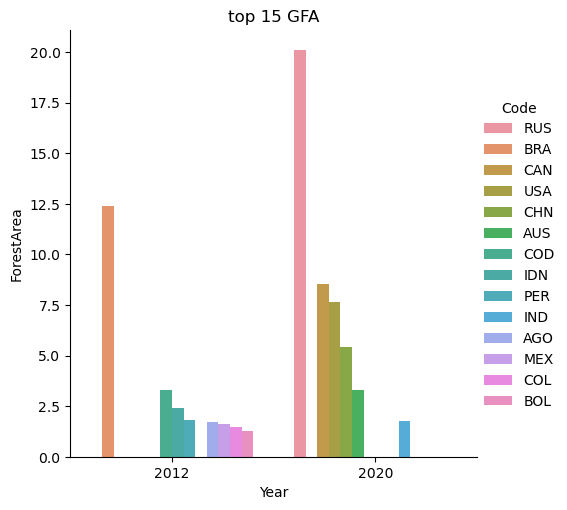

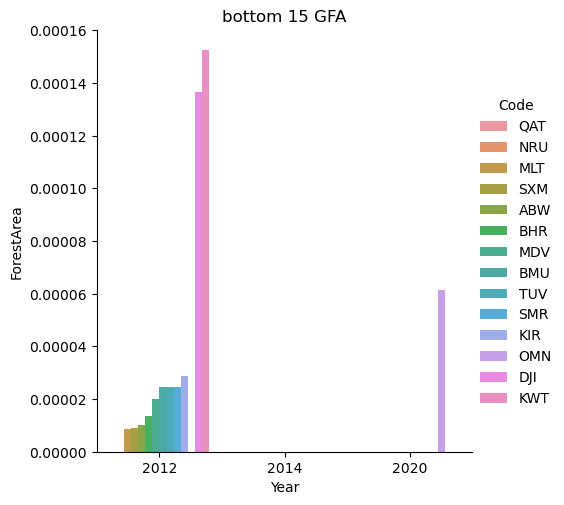

In [72]:
sns.catplot(data=top15GFA, x="Year", y="ForestArea", hue="Code", kind="bar").set(title='top 15 GFA')
sns.catplot(data=bottom15GFA, x="Year", y="ForestArea", hue="Code", kind="bar").set(title='bottom 15 GFA')

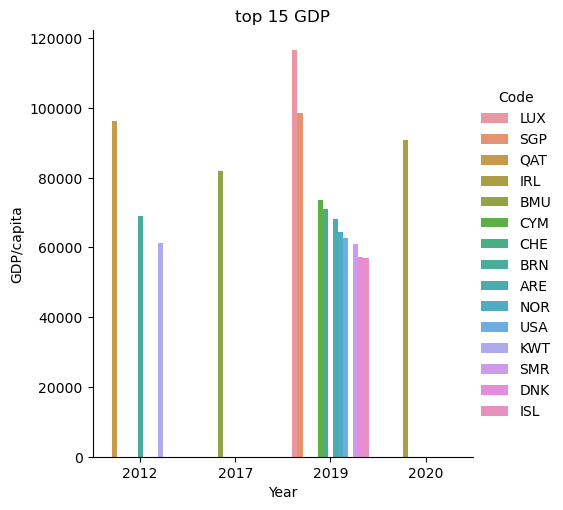

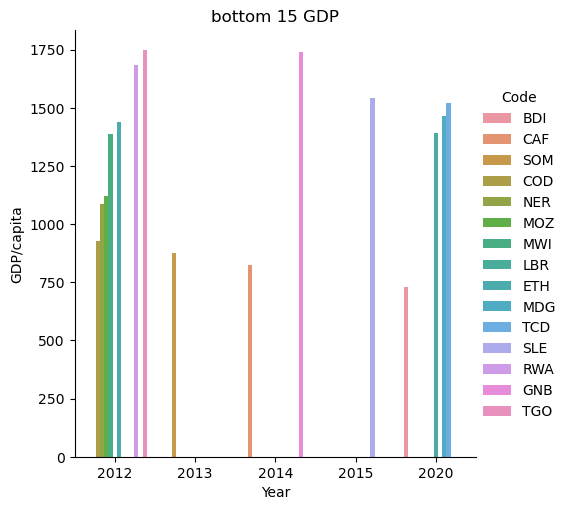

In [73]:


sns.catplot(data=top15GDP, x="Year", y="GDP/capita", hue="Code", kind="bar").set(title='top 15 GDP')
sns.catplot(data=bottom15GDP, x="Year", y="GDP/capita", hue="Code", kind="bar").set(title='bottom 15 GDP')

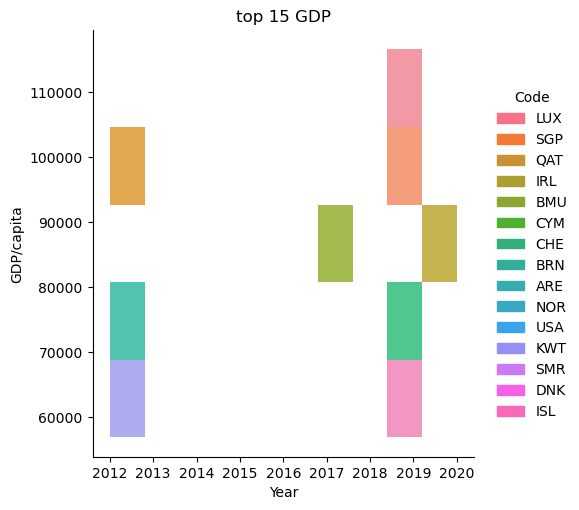

In [74]:
sns.displot(data=top15GDP, x="Year", y="GDP/capita", hue="Code").set(title='top 15 GDP')


The data is scattered over the year for the top and bottom GFA and GDP countries, hence if i use other kind of plotting style, it doesn't make sense whihc is why I kept it with catplot only.
From the visualisation we can see that top and bottom 15 countires of GFA doesnt in directly relate to top/bottom 15 GDP countires.
As we see countries lik Qatar and Kuwait belongs to top GDP countries however, they also belong to coutnries with no forest area. Then again, USA belongs to top 15 GDP and top 15 GFA countries too.
Hence, we can conclude that, we cannot create a direct definite connection between these two, GDP and GFA are not directly related to each other, other factor likes, countries area, geographiacl location etc plays an important role